## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website. Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# reading the dataset
df = pd.read_csv('ab_data.csv')

# load the first 5 rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# checking for the number of rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
# checking the number of unique users in the dataset
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
# the proportion of users converted
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# using query, we check for the number of times 
# new page and treatment don't match
match_not = df.query('group == "control"').query('landing_page == "new_page"')['user_id'].count() + df.query('group == "treatment"').query('landing_page == "old_page"')['user_id'].count()
match_not

3893

f. Do any of the rows have missing values?

In [7]:
# inspecting the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [8]:
# checking if any columns have null value
# should print False if none
df.isnull().sum().any()

False

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# combining rows that match only
df2 = df2 = df.query('group == "control" and landing_page =="old_page" or group == "treatment" and landing_page =="new_page"')

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
# checking the number of unique users in our new dataset
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.duplicated(subset = 'user_id') == True]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
# row information of the repeat user_id
df2[df2.duplicated(subset = 'user_id') == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# number of rows before removing the duplicate 
df2['user_id'].shape

(290585,)

In [15]:
# drop one of the rows that belongs to the repeat user_id
df2 = df2.drop_duplicates(subset = 'user_id', keep = 'first')


In [16]:
# number of rows after removing the duplicate
df2['user_id'].shape

(290584,)

In [17]:
# print number of duplicates to confirm dedupe - should be 0
print(df2.duplicated().sum())

0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
# the probability of an individual converting 
# regardless of the page they receive
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
# probability of an individual in 
# the control group converted
df2.query("group == 'control'").converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
# probability of an individual in 
# the treatment group converted
df2.query("group == 'treatment'").converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [21]:
(df2.landing_page == 'new_page').mean() 

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer:** Based on the output above, the control group has a slightly higher conversion rate of *12.04%* than the treatment group with *11.88%* conversion rate. 

So, we do not have sufficient evidence to conclude that the new treatment page leads to more conversions for the company.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_0: p_{new} - p_{old} \leq 0$**

**$H_1: p_{new} - p_{old} > 0$**


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [22]:
# we assume that convertion rate for p_new under the null 
# is the same as that of the entire dataset
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [23]:
# conversion rate for p_old under the null
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [24]:
# the number of individuals in the treatment group
treatment_size = df2.query('group == "treatment"')
n_new = treatment_size.shape[0]
n_new 

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [25]:
# the number of individuals in the control group
control_size = df2.query('group == "control"')
n_old = control_size.shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
# simulating n_new with p_new under null
new_page_converted = np.random.choice([0,1],size=n_new, p=[1-p_new,p_new])
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.choice([0,1], size =n_old, p=[1-p_old, p_old])
old_page_converted

array([1, 0, 0, ..., 0, 0, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
diff = (new_page_converted.mean() - old_page_converted.mean())
diff

-0.00029119357877605001

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [29]:
p_diffs = []

new_page_converted = np.random.binomial(n_new, p_new, 10000)/ n_new
old_page_converted = np.random.binomial(n_old, p_old, 10000)/n_old
diffs = new_page_converted - old_page_converted
p_diffs.append(diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

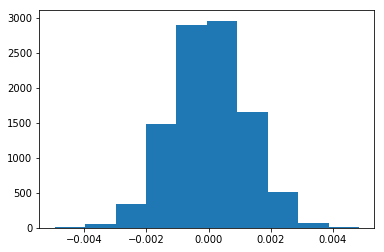

In [30]:
plt.hist(p_diffs);

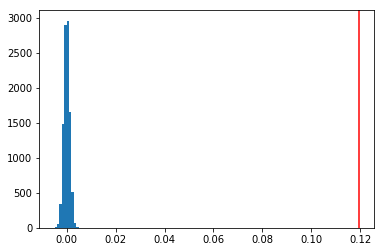

In [31]:
plt.hist(p_diffs);
plt.axvline(x=df2.converted.mean(), color = 'red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
p_diffs = np.array(p_diffs)
p_diffs

array([[  1.25049180e-03,  -2.45909389e-03,   5.98944613e-05, ...,
          1.91795684e-03,  -1.34414903e-03,  -8.96959111e-04]])

In [33]:
obs_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
obs_diff

-0.0015782389853555567

In [34]:
(p_diffs > obs_diff)

array([[ True, False,  True, ...,  True,  True,  True]], dtype=bool)

In [35]:
(p_diffs > obs_diff).mean()

0.90890000000000004

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer**

The value above represents the probability of a statistic higher than the observed which is called *p-value*. Given that the null hypothesis is true, this value means that there is no statistically significant difference between the new and old pages

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [36]:
converted_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]
converted_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]

In [37]:
n_old = df2.shape[0] - df2.query("landing_page == 'new_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

In [38]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [39]:
z_score, p_value = sm.stats.proportions_ztest([converted_new, converted_old], [n_new, n_old], alternative = 'larger')
z_score, p_value

(-1.3109241984234394, 0.90505831275902449)

In [40]:
# for our one-side test, assumed at 95% confidence level, we calculate:
from scipy.stats import norm
critical_value = norm.ppf(1-(0.05/2))
critical_value

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:**

Since z_score is less than 1.95996, we fail to reject the null; which is consistent with the results in parts **j.** and **k.** 

Yes, they do agree with the findings in parts **j.** and **k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer**

Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [41]:
# creating intercept column
df2['intercept'] = 1

# creating intercept column, then adding a dummy variable 
# for the group (treatment value only)
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [42]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [43]:
# fitting the model using statsmodels
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [44]:
# here is the summary of the model
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 20 Jun 2021   Pseudo R-squ.:               8.077e-06
Time:                        08:36:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [45]:
1/np.exp(-0.0150)

1.0151130646157189

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer:**

The p-value is 0.190 as shown in the summary

**$H_0: p_{new} - p_{old} = 0$**

**$H_1: p_{new} - p_{old}\neq 0$**

The difference is, in part II, we performed a one-sided test, where in the logistic regression which is part III, it is two-sided test.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:** 

It is useful to consider adding other variables into our regression model to ensure we are not actually missing out some variables that might impact our efficiency to identify the main point of interest, which is landing page in this model. However, inducting additional variables to our regression model means that we will reduce the degree of freedom we have to spot significant effects. 

For example, multicollinearity is when we have predictor variables that are correlated with one another. This can lead to coefficients being flipped from the direction that we expect from our regression model.


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [46]:
# loading country dataset
df3 = pd.read_csv('./countries.csv')

# merging the datasets
df_new = df3.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [47]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [48]:
# creating the necessary dummy variables
df_new[['US', 'UK']] = pd.get_dummies(df_new['country'])[['US','UK']]

In [49]:
# fitting the model using statsmodel and get the summary
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'US', 'UK']])
results1 = log_mod.fit()
results1.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 20 Jun 2021   Pseudo R-squ.:               1.521e-05
Time:                        08:36:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

**Answer:**
No, we have no statistical evidence that country had an impact on conversion

In [50]:
df_new['ab_page_US'] = df_new['ab_page']*df_new['US'] 
df_new['ab_page_UK'] = df_new['ab_page']*df_new['UK']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,ab_page_US,ab_page_UK
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [51]:
# fitting the model using statsmodel and get the summary
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'UK', 'ab_page_US', 'ab_page_UK']])
results2 = log_mod.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 20 Jun 2021   Pseudo R-squ.:               3.482e-05
Time:                        08:36:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
ab_page_US     0.0469      0.054      0.872      0.383      -0.059       0.152
ab_page_UK     0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

#### Conclusions
Looking at the results above, it is more or less obvious that there is no statistically significant difference between the new and the old page when it comes to converting users based on country which also follows from the results in the previous parts

Therefore, we fail to reject the null hypothesis. I recommend that the e-commerce company should keep the old page as this will save time and money on creating a new page.

#### References

Learned from fellow student how to create df2 - https://knowledge.udacity.com/questions/36758

Identified n_new and n_old - https://knowledge.udacity.com/questions/304441

Performed simulation using np.random.choice - https://knowledge.udacity.com/questions/177759

ramdom sampling - https://knowledge.udacity.com/questions/464946#464955

Case Study: A/B tests was followed for the early part of the project - https://classroom.udacity.com/nanodegrees/nd002/parts/bb0cbeb6-d3f8-4bae-9dc3-4abba3823e54/modules/70ab0502-76fb-425f-880e-e2c73cdbe753/lessons/f3088061-6562-445e-b1a7-a86c9389c2b5/concepts/b17575e2-b06c-418f-89f2-3f601a72e820

Hypothesis Testing lesson was also made references to - https://classroom.udacity.com/nanodegrees/nd002/parts/bb0cbeb6-d3f8-4bae-9dc3-4abba3823e54/modules/70ab0502-76fb-425f-880e-e2c73cdbe753/lessons/ad8aca80-f444-4479-8848-5b07bafaf66c/concepts/44f1372d-e5dc-4e9f-b26a-10d62a880728

The countries dataset was merged with the ab_data using - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html

Fitting the regression model based on country - https://knowledge.udacity.com/questions/273596



In [52]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0